Below are the solutions to the SIRD disease differential equations for smallpox.

Blue shows the number of susceptible people, S(t).
Red shows the number of infected people, I(t).
Green shows the number of recovered people, R(t).
Black shows the number of deceased people, D(t).


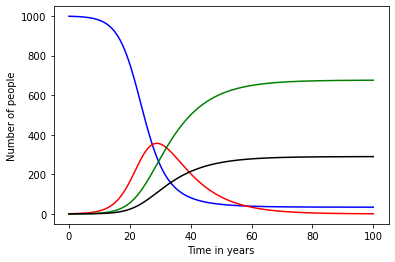

In [1]:
#EXAMPLE 1: Calculate the SIRD model for smallpox
import matplotlib.pyplot as plt
import numpy as np
import math

#step 1 = write the diff_eq function
a=10**(-3)
t_points=np.arange(0,100,2*a)

def model_SIRD(S,I,R,D,B,N,y,u):
    #S,I,R,D are functions
    #B,N,y,u are constants
    S_dot = (-B/N)*S*I
    I_dot = ((B/N)*S*I)-(y*I)-(u*I)
    R_dot = y*I
    D_dot = u*I
    return S_dot, I_dot, R_dot, D_dot

def find_function(B,N,y,u,t_points):
    S = np.empty(len(t_points))
    I = np.empty(len(t_points))
    R = np.empty(len(t_points))
    D = np.empty(len(t_points))
    I[0]=1
    R[0]=0
    S[0]=N-R[0]-I[0]
    D[0]=0
    for t in range(0,len(t_points)-1):
        S_dot,I_dot,R_dot,D_dot = model_SIRD(S[t],I[t],R[t],D[t],B,N,y,u)
        S[t+1] = S[t]+2*a*S_dot
        I[t+1] = I[t]+2*a*I_dot
        R[t+1] = R[t]+2*a*R_dot
        D[t+1] = D[t]+2*a*D_dot
    return S,I,R,D

#step 2 = calculate and graph
"""
For smallpox:
1/y = 13 days
R0 = B/y = 5
M= (u/(y+u)) = 30% = 0.3
"""
N=1000
B=0.3846153845
y=0.0769230769
u=0.032967033

pox_S,pox_I,pox_R,pox_D = find_function(B,N,y,u,t_points)
plt.plot(t_points,pox_S,'k',color='blue')
plt.plot(t_points,pox_I,'k',color='red')
plt.plot(t_points,pox_R,'k',color='green')
plt.plot(t_points,pox_D,'k',color='black')
plt.xlabel("Time in years")
plt.ylabel("Number of people")

print("Below are the solutions to the SIRD disease differential equations for smallpox.")
print("\nBlue shows the number of susceptible people, S(t).")
print("Red shows the number of infected people, I(t).")
print("Green shows the number of recovered people, R(t).")
print("Black shows the number of deceased people, D(t).")

Below are the solutions to the SIRVD disease differential equations for smallpox.
Notice how different these graphs are! Even when the vaccine taked 1000 days to be created!

Blue shows the number of susceptible people, S(t).
Red shows the number of infected people, I(t).
Green shows the number of recovered people, R(t).
Teal shows the number of vaccinated people, V(t).
Black shows the number of deceased people, D(t).


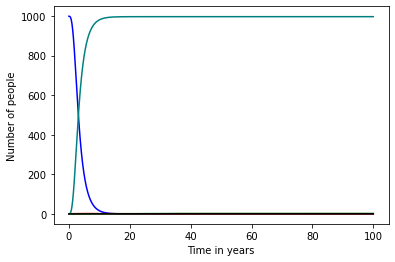

In [26]:
#EXAMPLE 2: Calculate the SIRVD model for smallpox
import matplotlib.pyplot as plt
import numpy as np
import math

#step 1 = write the new diff_eq function
a=10**(-3)
t_points=np.arange(0,100,2*a)

def vaccine(t):
    #v(t)=v_m * (1-e^(-t^2/t_r^2))
    #The following v_m and t_r values were assigned for smallpox in Python4Physics
    v_m = 0.5
    t_r = 1000
    v= (v_m)*(1-(2.718**((-t**2)/(t_r**2))))
    return v

def model_SIRD(S,I,R,V,D,B,N,y,u,v):
    S_dot = ((-B/N)*S*I)-(v*S)
    I_dot = ((B/N)*S*I)-(y*I)-(u*I)
    R_dot = y*I
    V_dot = v*S
    D_dot = u*I
    return S_dot, I_dot, R_dot, V_dot, D_dot

def find_function(B,N,y,u,t_points):
    #Initializing everything
    S = np.empty(len(t_points))
    I = np.empty(len(t_points))
    R = np.empty(len(t_points))
    V = np.empty(len(t_points))
    D = np.empty(len(t_points))
    I[0]=1
    R[0]=0
    V[0]=0
    S[0]=N-R[0]-I[0]-V[0]
    D[0]=0
    #Finding the functions
    for t in range(0,len(t_points)-1):
        v=vaccine(t) #evaluating the v(t) vaccine function at time t
        S_dot,I_dot,R_dot,V_dot,D_dot = model_SIRD(S[t],I[t],R[t],V[t],D[t],B,N,y,u,v)
        S[t+1] = S[t]+2*a*S_dot
        I[t+1] = I[t]+2*a*I_dot
        R[t+1] = R[t]+2*a*R_dot
        V[t+1] = V[t]+2*a*V_dot
        D[t+1] = D[t]+2*a*D_dot
    return S,I,R,V,D

#step 2 = calculate and graph
"""
For smallpox:
1/y = 13 days
R0 = B/y = 5
M= (u/(y+u)) = 30% = 0.3
"""
N=1000
B=0.3846153845
y=0.0769230769
u=0.032967033

pox_S,pox_I,pox_R,pox_V,pox_D = find_function(B,N,y,u,t_points)
plt.plot(t_points,pox_S,'k',color='blue')
plt.plot(t_points,pox_I,'k',color='red')
plt.plot(t_points,pox_R,'k',color='green')
plt.plot(t_points,pox_V,'k',color='teal')
plt.plot(t_points,pox_D,'k',color='black')
plt.xlabel("Time in years")
plt.ylabel("Number of people")

print("Below are the solutions to the SIRVD disease differential equations for smallpox.")
print("Notice how different these graphs are! Even when the vaccine taked 1000 days to be created!")

print("\nBlue shows the number of susceptible people, S(t).")
print("Red shows the number of infected people, I(t).")
print("Green shows the number of recovered people, R(t).")
print("Teal shows the number of vaccinated people, V(t).")
print("Black shows the number of deceased people, D(t).")